### Explore data

In [40]:
with open('data/prim_fwd.valid') as file:
    lines = [line.rstrip('\n') for line in file]

In [41]:
lines[0:20]

["548021|sub Y' pow x INT+ 2\tmul div INT+ 1 INT+ 3 pow x INT+ 3",
 "183681|sub Y' add x pow x INT+ 3\tadd mul div INT+ 1 INT+ 2 pow x INT+ 2 mul div INT+ 1 INT+ 4 pow x INT+ 4",
 "143325|sub Y' ln x\tadd mul INT- 1 x mul x ln x",
 "84835|sub Y' add x ln x\tadd mul div INT+ 1 INT+ 2 pow x INT+ 2 add mul INT- 1 x mul x ln x",
 "69739|sub Y' pow x div INT+ 5 INT+ 2\tmul div INT+ 2 INT+ 7 pow x div INT+ 7 INT+ 2",
 "50068|sub Y' mul INT+ 4 pow x INT- 1\tmul INT+ 4 ln x",
 "39804|sub Y' mul INT+ 9 pow x INT+ 2\tmul INT+ 3 pow x INT+ 3",
 "34036|sub Y' add x mul INT+ 5 pow x INT+ 2\tadd mul div INT+ 1 INT+ 2 pow x INT+ 2 mul div INT+ 5 INT+ 3 pow x INT+ 3",
 "29607|sub Y' ln pow x INT+ 3\tadd mul INT- 3 x mul x ln pow x INT+ 3",
 "25433|sub Y' mul x add x mul INT- 1 pow x INT+ 2\tadd mul div INT- 1 INT+ 4 pow x INT+ 4 mul div INT+ 1 INT+ 3 pow x INT+ 3",
 "21296|sub Y' add x acosh x\tadd mul div INT+ 1 INT+ 2 pow x INT+ 2 add mul INT- 1 sqrt add INT- 1 pow x INT+ 2 mul x acosh x",
 "18506|s

In [27]:
from src.envs.sympy_utils import simplify
from src.evaluator import idx_to_sp

In [28]:
idx_to_sp(lines[0][7:].split('\t')[0])

TypeError: idx_to_sp() missing 1 required positional argument: 'idx'

In [25]:
simplify(, 10)

SympifyError exception when simplifying sub Y' pow x INT+ 2


"sub Y' pow x INT+ 2"

### Results and metrics

In [5]:
with open('dumped/first_train/142567/train.log') as file:
    lines = [line.rstrip('\n') for line in file]

In [6]:
import json

whole_dict = {}

for line in lines:
    if '__log__' in line:
        json_line = json.loads(line[line.find('{'):])
        for key in json_line:
            if key not in whole_dict:
                whole_dict[key] = []
            whole_dict[key].append(json_line[key])                

In [7]:
import seaborn as sns
sns.set()

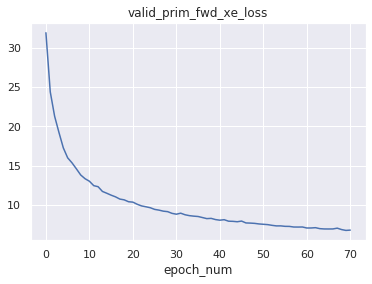

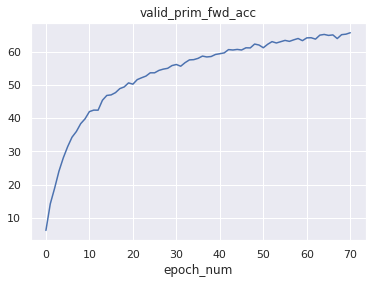

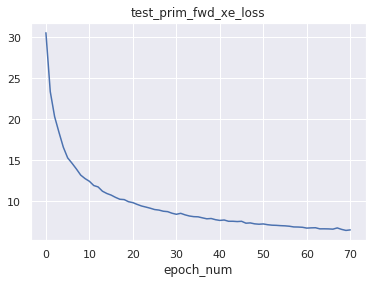

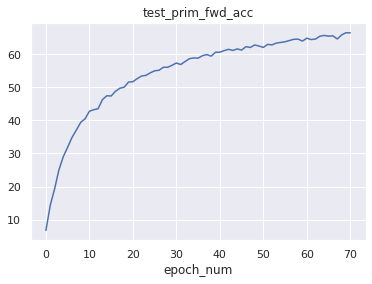

In [8]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']
for key in whole_dict:
    if key in needed:
        plt.plot(whole_dict[key])
        plt.xlabel('epoch_num')
        plt.title(key)
        plt.show()